# Problem Statement: Credit Card Lead Prediction
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

•	Customer details (gender, age, region etc.)

•	Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)


# Problem Definition
We are going to build classification models which will predict propensity (probability) of customers who are willing to take the credit card offer by the Happy Bank. The probabilities from the model will be used to classify the outcome and identify variables that influence the response. The goal is to build a model that identifies customers who are most likely to accept the offer in future. 

# Data Clean-up and Preparation
we set up the working directory and read the dataset in csv format into Python

In [85]:
# Importing important libraries
import numpy as np
import pandas as pd
# Vizualizing data
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


In [86]:
df_train = pd.read_csv("/content/train_s3TEQDk.csv")
df_test = pd.read_csv("/content/test_mSzZ8RL.csv")
df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [87]:
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


we view the dataset to understand the columns and their data types, and number of records present.

In [88]:
#Checking the data type of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


Upon viewing the dataset, we infer:
There are 245725 observations and 11 variables.
We have a mix of integer, numeric, and factor variables.
The categorical response variable, representing if a customer responded to the recommendation or not, is the variable called ‘Is_Lead’; 0 - customer is not interested / 1 - customer is interested 

In [89]:
# Checking the dimension of the data sets
df_train.shape,df_test.shape

((245725, 11), (105312, 10))

We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.

In [90]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [91]:
#categorical features
categorical = df_test.select_dtypes(include =[np.object])
print("Categorical Features in test Set:",categorical.shape[1])

#numerical features
numerical= df_test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in test Set:",numerical.shape[1])

Categorical Features in test Set: 7
Numerical Features in test Set: 3


In [92]:
#Checking the missing or null values
df_train.isnull().sum()/df_train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [93]:
df_test.isnull().sum()/df_test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In the train data and test data only 'Credit_Product' column has missing value.

In [94]:
df_train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [95]:
df_test['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [96]:
#Imputing the missing values with Mode (here we can directly fill the value with 'No', because only two values are present in the 'Credit_Product' column )
df_train['Credit_Product']= df_train['Credit_Product'].fillna(df_train['Credit_Product'].mode()[0])
df_test['Credit_Product']= df_test['Credit_Product'].fillna(df_test['Credit_Product'].mode()[0])

In [97]:
# Checking once again the missing values
df_train['Credit_Product'].isnull().sum(), df_test['Credit_Product'].isnull().sum()

(0, 0)

#Statistical Summary of Data
Statistical summary gives the mean, standard deviation, minimum and maximum value, and the quartile values of the numerical variables.  

In [98]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


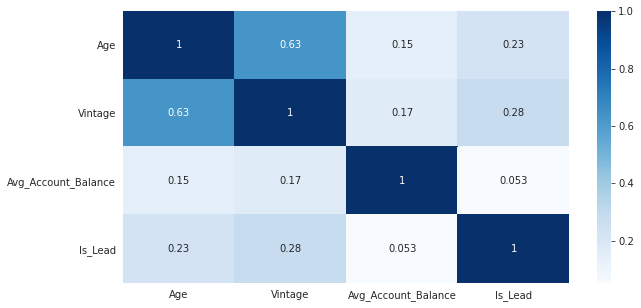

In [99]:
# Plot the correlation
plt.figure(figsize=(10, 5))
ax = plt.subplot()
g = sns.heatmap(df_train.corr(),annot=True, cmap='Blues')

In the correlation plot we can see that there is no negative correlation in data and also most important is that it only showing the correlation between the 4 variables. We need to check the important features in the data set.

In the banking centre Average account balance is one of the most important criteria for the bank to offer different financial products to the customer. here we can see the correlation between 'Avg_Account_Balance' and the target vaiable 'Is_Lead' is the least. we need to explore this problem also. 

#Exploratory Data Analysis

We will explore the data visually and see the patterns in the data distribution. 

In [100]:
df_train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


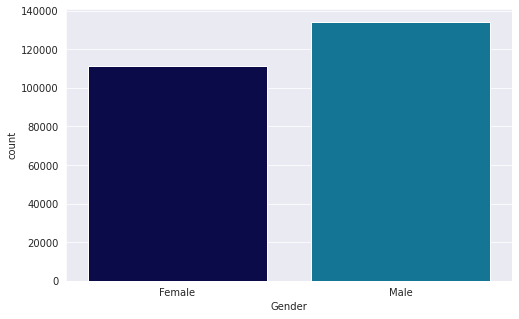

In [101]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=df_train,palette='ocean')

Male customers are more in number

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


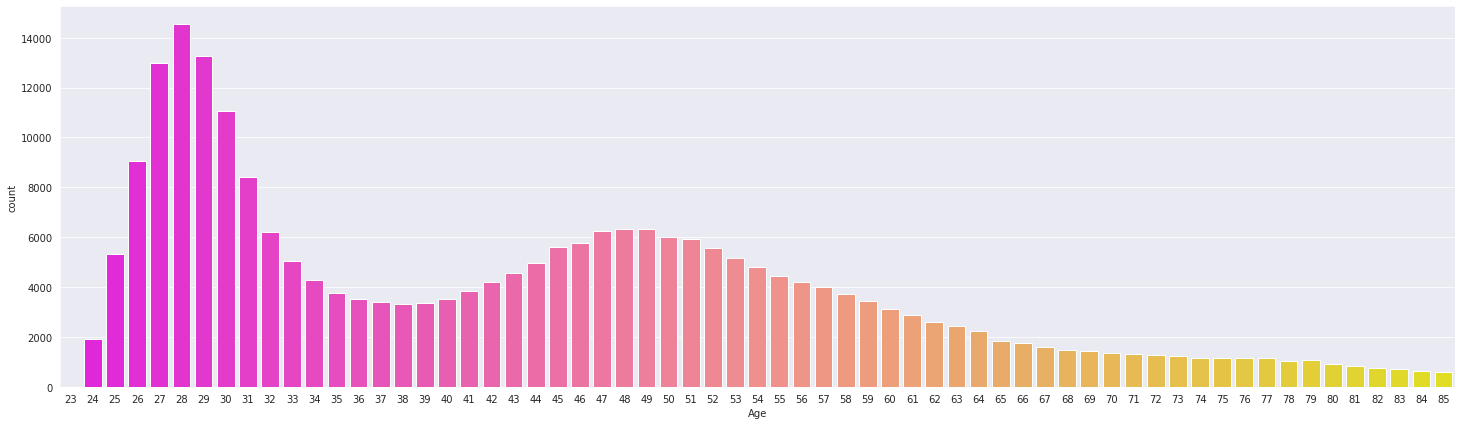

In [102]:
plt.figure(figsize=(25,7))
sns.countplot('Age',data=df_train,palette='spring')

most customers are in the age group 25 to 35 years of age.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


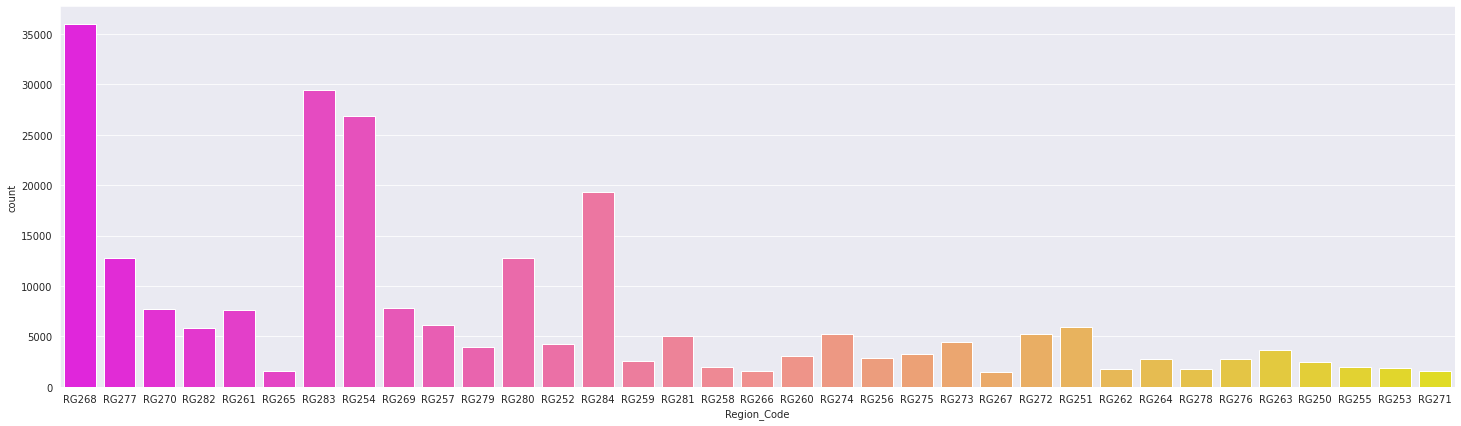

In [103]:
plt.figure(figsize=(25,7))
sns.countplot('Region_Code',data=df_train,palette='spring')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


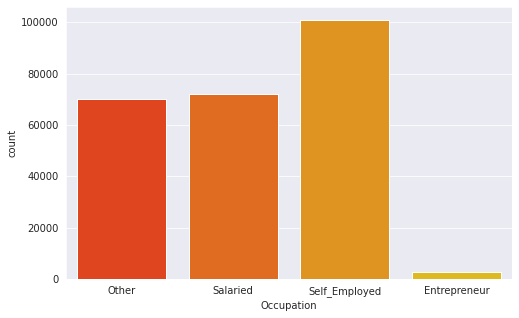

In [104]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=df_train,palette='autumn')

most number of customers are in self_employed category.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


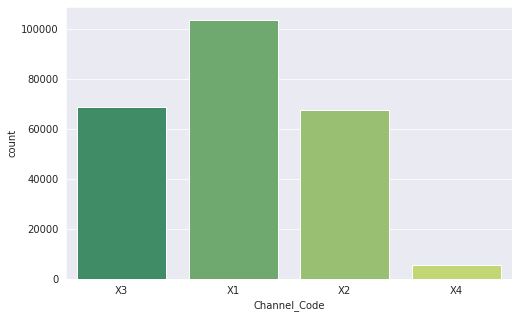

In [105]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=df_train,palette='summer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


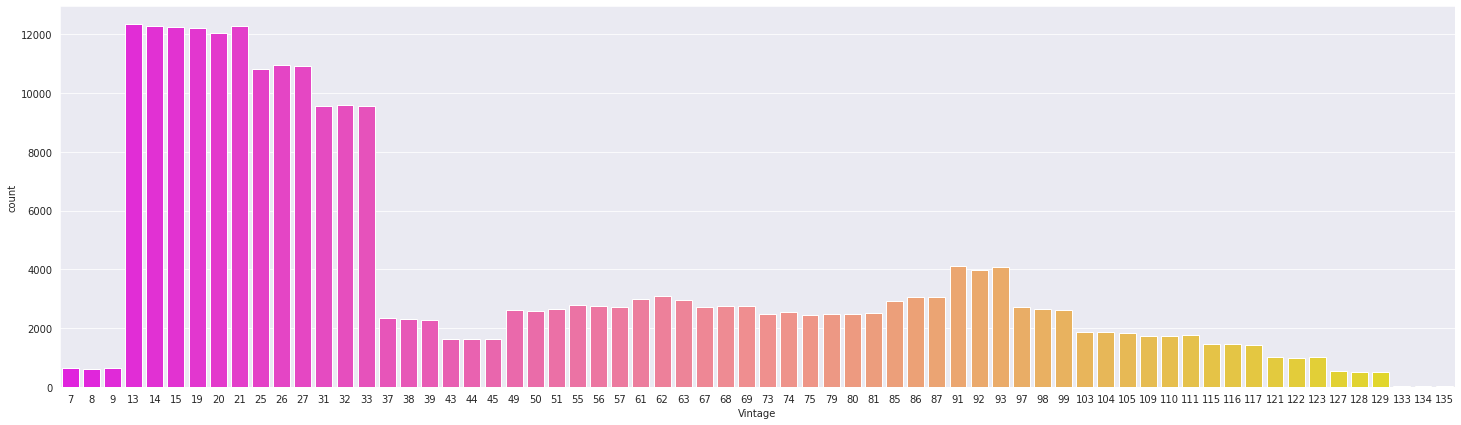

In [106]:
plt.figure(figsize=(25,7))
sns.countplot('Vintage',data=df_train,palette='spring')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


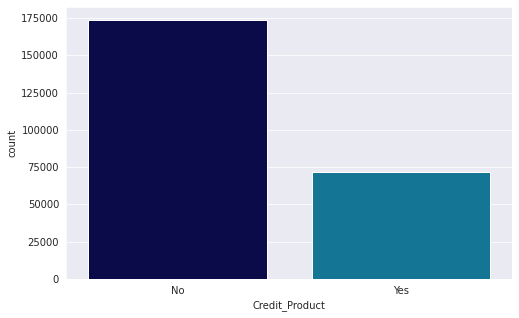

In [107]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=df_train,palette='ocean')

less than 50% of the customers are having Credit_product

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


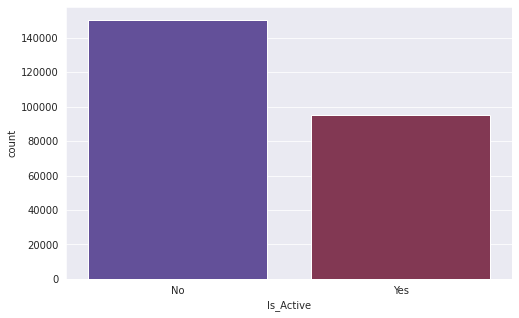

In [108]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=df_train,palette='twilight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


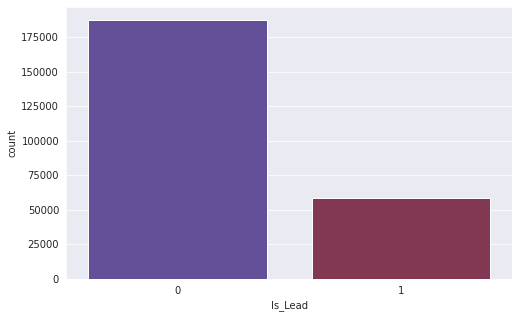

In [109]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Lead',data=df_train,palette='twilight')

Very few customers have shown interest in the credit card. 

We will check the exact number ofcustomers.

In [110]:
df_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

Less than 25% of the customers have shown their interest for credit card

In [111]:
#Checking the count value in Avg_Account_Balance 
df_train['Avg_Account_Balance'].value_counts()

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
1016388      1
516680       1
1043017      1
784971       1
2760299      1
Name: Avg_Account_Balance, Length: 135292, dtype: int64

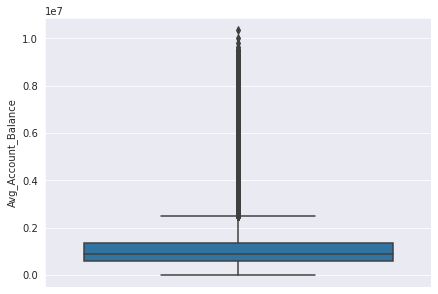

In [112]:
sns.boxplot(y= df_train['Avg_Account_Balance'], data=df_train)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The 'Avg_Account_Balance' is showing outliers, but for banking sector data modelling, removing outlier is not good for the business. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


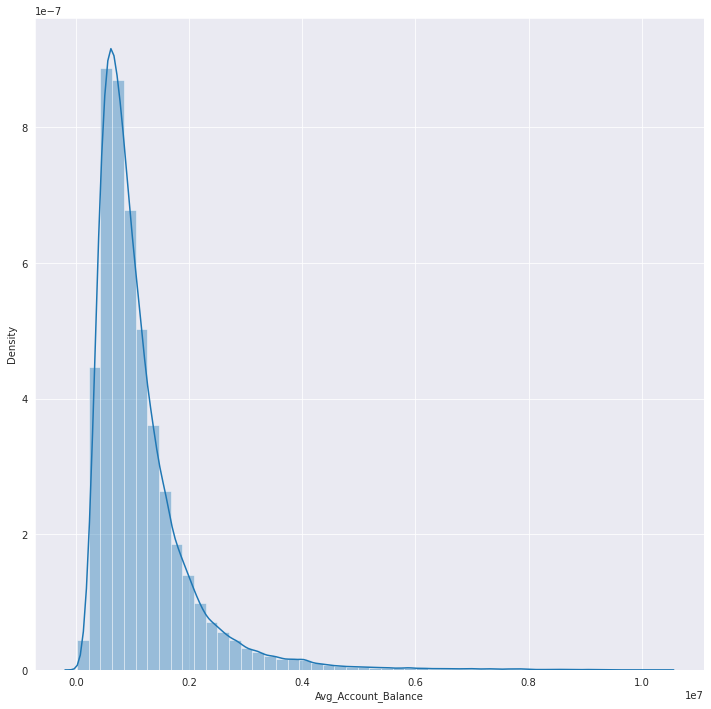

In [113]:
fig = plt.figure(figsize=(12,12))
sns.distplot(df_train['Avg_Account_Balance'])

We will scale the data by MinMaxScaler 

In [114]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
df_train[['Avg_Account_Balance']] = scaler.fit_transform(df_train[['Avg_Account_Balance']])
df_train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,0.099205,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,0.054321,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,0.141660,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,0.043525,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,0.083823,No,0


In [115]:
df_test[['Avg_Account_Balance']] = scaler.fit_transform(df_test[['Avg_Account_Balance']])

In [116]:
df_test.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,0.072805,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,0.091333,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,0.019558,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,0.085520,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,0.064179,No


#Dropping ID Column
The columns 'ID' is not required for the training of the algorithm,  it is used for unique identification of the customers. 

In [117]:
df_train.shape, df_test.shape

((245725, 11), (105312, 10))

In [118]:
train= df_train.drop(['ID'], axis=1)
test =df_test.drop(['ID'],axis=1)

In [119]:
train.shape, test.shape

((245725, 10), (105312, 9))

In [120]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,0.099205,No,0
1,Female,30,RG277,Salaried,X1,32,No,0.054321,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,0.141660,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,0.043525,No,0
4,Female,30,RG282,Salaried,X1,33,No,0.083823,No,0


#Converting object type data into numerical data

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].dtype == 'object':
        if len(list(train[c].unique())) <= 2:
            train[c] = le.fit_transform(train[c])
            test[c] = le.transform(test[c])

In [122]:
train.describe()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000
mean,0.546127,43.856307,46.959141,0.293185,0.107210,0.388381,0.237208
std,0.497869,14.828672,32.353136,0.455224,0.082559,0.487383,0.425372
min,0.000000,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,20.000000,0.000000,0.056481,0.000000,0.000000
50%,1.000000,43.000000,32.000000,0.000000,0.084580,0.000000,0.000000
75%,1.000000,54.000000,73.000000,1.000000,0.130273,1.000000,0.000000
max,1.000000,85.000000,135.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  int64  
 1   Age                  245725 non-null  int64  
 2   Region_Code          245725 non-null  object 
 3   Occupation           245725 non-null  object 
 4   Channel_Code         245725 non-null  object 
 5   Vintage              245725 non-null  int64  
 6   Credit_Product       245725 non-null  int64  
 7   Avg_Account_Balance  245725 non-null  float64
 8   Is_Active            245725 non-null  int64  
 9   Is_Lead              245725 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 18.7+ MB


In [124]:
train['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [125]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [126]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,0.099205,0,0
1,0,30,27,2,0,32,0,0.054321,0,0
2,0,56,18,3,2,26,0,0.141660,1,0
3,1,34,20,2,0,19,0,0.043525,0,0
4,0,30,32,2,0,33,0,0.083823,0,0


In [127]:
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,0.072805,0
1,1,43,18,1,1,49,0,0.091333,0
2,1,31,20,2,0,14,0,0.019558,0
3,1,29,22,1,0,33,0,0.085520,0
4,0,29,20,1,0,19,0,0.064179,0


# Separate features and target from the train data set

In [128]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [129]:
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

In [130]:
X.shape, y.shape

((245725, 9), (245725,))

# Taking out 20% data as validation set

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [132]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_valid dataset: ", X_valid.shape)
print("Number transactions y_valid dataset: ", y_valid.shape)

Number transactions X_train dataset:  (196580, 9)
Number transactions y_train dataset:  (196580,)
Number transactions X_valid dataset:  (49145, 9)
Number transactions y_valid dataset:  (49145,)


In [133]:
# Scaling X_train and X_test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_valid = scaler.transform(X_valid)
rescaledX = scaler.transform(X)

#Machine Learning Models 

# Feature Selection
I am going to use RandomForest classifier for feature selection. 
At first i will check how the Random Forest classifier model work on all the features.


In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print("Random Forest classifier has accuracy of: ", rf.score(X_valid, y_valid))
# Evaluate the confusion_matrix
confusion_matrix(y_valid, y_pred)

Random Forest classifier has accuracy of:  0.7769050768135111


array([[34469,  2989],
       [ 7975,  3712]])

In [135]:
roc_auc_score= rf.score(X_valid, y_valid)
roc_auc_score

0.7769050768135111

In [136]:
from sklearn.feature_selection import SelectFromModel
select= SelectFromModel(RandomForestClassifier(n_estimators =100))
select.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [137]:
select.transform(X)
select.get_support() # answer should be in True and False
                    # True means feature is important

array([False,  True,  True, False, False,  True, False,  True, False])

In [138]:
variable_imp = pd.DataFrame({"Importance": list(select.get_support()), "Feature_name": list(X.columns)})
variable_imp

,Importance,Feature_name
0,False,Gender
1,True,Age
2,True,Region_Code
3,False,Occupation
4,False,Channel_Code
5,True,Vintage
6,False,Credit_Product
7,True,Avg_Account_Balance
8,False,Is_Active


Now I will train a model by keeping only important features in data. In correlation graph also we have obsorve that Age, Region_Code, Vintage, Avg_Account_Balance columns are importatnt.

# Dropping the unimportant featues

In [139]:
del_columns= ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
X1 = X.drop(labels = del_columns,axis = 1)

In [140]:
X1.head()

,Age,Region_Code,Vintage,Avg_Account_Balance
0,73,18,43,0.099205
1,30,27,32,0.054321
2,56,18,26,0.141660
3,34,20,19,0.043525
4,30,32,33,0.083823


In [141]:
#Also dropping the features from the test data set
test1 = test.drop(labels= del_columns, axis=1)

In [142]:
test1.head()

,Age,Region_Code,Vintage,Avg_Account_Balance
0,29,4,25,0.072805
1,43,18,49,0.091333
2,31,20,14,0.019558
3,29,22,33,0.085520
4,29,20,19,0.064179


In [143]:
# keeping 20% data to validate the model
X1_train,X1_valid,y_train,y_valid = train_test_split(X1,y,test_size=0.2,random_state=22)

In [144]:
# Scalling the data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX1_train = scaler.fit_transform(X1_train)
rescaledX1_valid = scaler.transform(X1_valid)
print(rescaledX1_train.shape, rescaledX1_valid.shape) 

(196580, 4) (49145, 4)


In [145]:
# Checking the improvement in Random Forest classifier after feature selection
rf1 = RandomForestClassifier(n_estimators=500)
rf1.fit(X1_train, y_train)
y_pred1 = rf1.predict(X1_valid)
print("Random Forest classifier has accuracy of: ", rf1.score(X1_valid, y_valid))
# Evaluate the confusion_matrix
confusion_matrix(y_valid, y_pred1)

Random Forest classifier has accuracy of:  0.738243971919829


array([[33343,  4115],
       [ 8749,  2938]])

In [146]:
roc_auc_score1= rf1.score(X1_valid, y_valid)
roc_auc_score1


0.738243971919829

In [147]:
#Comparing both the models
models = [('rf', roc_auc_score),
          ('rf1', roc_auc_score1)]

Model_comp = pd.DataFrame(data= models, columns=['Model', 'roc_auc_score'])
Model_comp

,Model,roc_auc_score
0,rf,0.776905
1,rf1,0.738244


The roc_auc_score here is saying that model is performing better with all the features. hence I will continue with the all features in data set and try to train other classifier models.

# Model Building and Validation
Let's start modelling by importing a few modules. Features are all on different scale, so it is wise to rescale
all features in the range -1, +1



In [148]:
#Importing libraries for model building
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
pip install catboost

In [153]:
from catboost import CatBoostClassifier

In [154]:
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)
# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_valid = scaler.transform(X_valid)
rescaledX = scaler.transform(X)

In [155]:
#Will check the performance of algorithm on entire data
def run_models(X_train, y_train, X_valid, y_valid, model_type = 'non-blanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'XGB': XGBClassifier(),
            'LogisticRegression' : LogisticRegression(),
            'KNN': KNeighborsClassifier(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
             'CatBoostClassifier': CatBoostClassifier(),
            'extra_tree_forest': ExtraTreesClassifier()}
    cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_valid)
        y_score = clf.predict_proba(X_valid)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_valid, y_score),
                         'precision_score': metrics.precision_score(y_valid, y_pred),
                         'recall_score': metrics.recall_score(y_valid, y_pred),
                         'f1_score': metrics.f1_score(y_valid, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_valid, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

computing GradientBoosting - im-balanced 
computing XGB - im-balanced 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


computing LogisticRegression - im-balanced 
computing KNN - im-balanced 
computing RandomForestClassifier - im-balanced 
Learning rate set to 0.098237
0:	learn: 0.6407442	total: 150ms	remaining: 2m 29s
1:	learn: 0.6020770	total: 211ms	remaining: 1m 45s
2:	learn: 0.5719814	total: 277ms	remaining: 1m 31s
3:	learn: 0.5506833	total: 343ms	remaining: 1m 25s
4:	learn: 0.5318727	total: 404ms	remaining: 1m 20s
5:	learn: 0.5139154	total: 480ms	remaining: 1m 19s
6:	learn: 0.5029552	total: 546ms	remaining: 1m 17s
7:	learn: 0.4931217	total: 615ms	remaining: 1m 16s
8:	learn: 0.4864970	total: 677ms	remaining: 1m 14s
9:	learn: 0.4804611	total: 747ms	remaining: 1m 13s
10:	learn: 0.4740576	total: 812ms	remaining: 1m 13s
11:	learn: 0.4699698	total: 871ms	remaining: 1m 11s
12:	learn: 0.4660618	total: 937ms	remaining: 1m 11s
13:	learn: 0.4631430	total: 1s	remaining: 1m 10s
14:	learn: 0.4602070	total: 1.08s	remaining: 1m 10s
15:	learn: 0.4579936	total: 1.15s	remaining: 1m 10s
16:	learn: 0.4563484	total: 1.

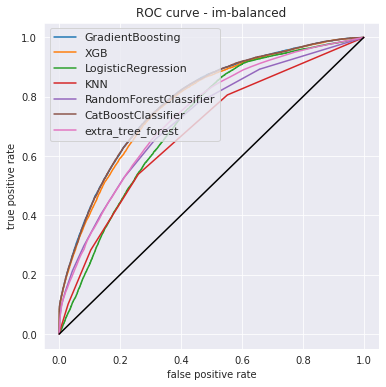

In [156]:
models_report, conf_matrix = run_models(X_train, y_train, X_valid, y_valid, model_type = 'im-balanced')

In [157]:
models_report

,model,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.787982,0.665550,0.255070,0.368799,im-balanced
1,XGB,0.781765,0.712266,0.198254,0.310174,im-balanced
2,LogisticRegression,0.715673,0.428625,0.097116,0.158354,im-balanced
3,KNN,0.681128,0.460917,0.283050,0.350721,im-balanced
4,RandomForestClassifier,0.725076,0.534369,0.297339,0.382078,im-balanced
5,CatBoostClassifier,0.787660,0.638174,0.282365,0.391506,im-balanced
6,extra_tree_forest,0.737919,0.507640,0.332592,0.401882,im-balanced


On the original data set the GradientBoosting model is performing better.

In [158]:
submission = pd.read_csv('/content/sample_submission_eyYijxG.csv')
model = GradientBoostingClassifier()
model.fit(X, y)
GB_predictions = model.predict(test)
submission['Is_Lead'] = GB_predictions
submission.to_csv('pred_test_GB.csv',index=False)


The accuracy of models are below 80%, means these are not the best predicting algorithms. 
The major reason behind this is the class-imbalamce in data.

#SMOTE Algorithm
SMOTE Algorithm used to oversampled the minority instances and made it equal to majority class. After oversamplling Both instances have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.
Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

In [159]:
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)
# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_valid = scaler.transform(X_valid)
rescaledX = scaler.transform(X)

In [160]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [161]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
index_split = int(len(X_train)/2)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
X_valid, y_valid = X_train[index_split:], y_train[index_split:]
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 46601
Before OverSampling, counts of label '0': 149979 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (299958, 9)
After OverSampling, the shape of train_y: (299958,) 

After OverSampling, counts of label '1': 149979
After OverSampling, counts of label '0': 149979


computing GradientBoosting - Balanced 
computing XGB - Balanced 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


computing LogisticRegression - Balanced 
computing KNN - Balanced 
computing RandomForestClassifier - Balanced 
Learning rate set to 0.117663
0:	learn: 0.6080473	total: 126ms	remaining: 2m 5s
1:	learn: 0.5702413	total: 241ms	remaining: 2m
2:	learn: 0.5302266	total: 348ms	remaining: 1m 55s
3:	learn: 0.5105690	total: 450ms	remaining: 1m 52s
4:	learn: 0.4911217	total: 551ms	remaining: 1m 49s
5:	learn: 0.4829083	total: 653ms	remaining: 1m 48s
6:	learn: 0.4681502	total: 758ms	remaining: 1m 47s
7:	learn: 0.4533084	total: 869ms	remaining: 1m 47s
8:	learn: 0.4486437	total: 978ms	remaining: 1m 47s
9:	learn: 0.4347022	total: 1.08s	remaining: 1m 47s
10:	learn: 0.4289360	total: 1.18s	remaining: 1m 46s
11:	learn: 0.4223066	total: 1.3s	remaining: 1m 47s
12:	learn: 0.4181507	total: 1.4s	remaining: 1m 46s
13:	learn: 0.4103433	total: 1.51s	remaining: 1m 46s
14:	learn: 0.4085816	total: 1.61s	remaining: 1m 46s
15:	learn: 0.4061925	total: 1.72s	remaining: 1m 45s
16:	learn: 0.4029170	total: 1.82s	remaining

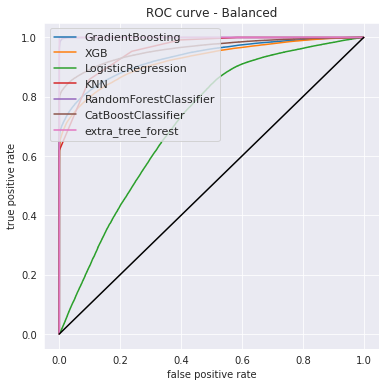

In [162]:
models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_valid, y_valid, model_type = 'Balanced')

In [163]:
models_report_bal

,model,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.933103,0.923268,0.832538,0.875559,Balanced
1,XGB,0.923112,0.910965,0.826943,0.866923,Balanced
2,LogisticRegression,0.714629,0.760179,0.691132,0.724013,Balanced
3,KNN,0.955932,0.871201,0.953323,0.910414,Balanced
4,RandomForestClassifier,0.999775,0.998442,0.986316,0.992342,Balanced
5,CatBoostClassifier,0.960342,0.962450,0.867512,0.912518,Balanced
6,extra_tree_forest,1.000000,1.000000,0.999992,0.999996,Balanced


Here is where a good business understanding of the practical situation comes in handy, along with roc_auc_score, getting a good recall a good precision are also important.

Looking at the models Report, we can say that RandomForestClassifier and extra_tree_forest models models are giving 100% accuracy, that's means they are highly overfitted, hence, we can reject these two models. 


After comparing all the metrics in the remaining five models, we can see that CatBoostclassifier model  is giving the highest accuracy. 

Based on the above, I am selecting CatBoostclassifier model as my final model.

# Final Prediction on test data set

In [165]:
submission = pd.read_csv('/content/sample_submission_eyYijxG.csv')
model = CatBoostClassifier()
model.fit(X_train, y_train)
final_predictions = model.predict(test)
submission['Is_Lead'] = final_predictions
submission.to_csv('pred_test_Cat_final.csv',index=False)

Learning rate set to 0.117663
0:	learn: 0.6080473	total: 101ms	remaining: 1m 40s
1:	learn: 0.5702413	total: 206ms	remaining: 1m 42s
2:	learn: 0.5302266	total: 315ms	remaining: 1m 44s
3:	learn: 0.5105690	total: 418ms	remaining: 1m 44s
4:	learn: 0.4911217	total: 524ms	remaining: 1m 44s
5:	learn: 0.4829083	total: 629ms	remaining: 1m 44s
6:	learn: 0.4681502	total: 742ms	remaining: 1m 45s
7:	learn: 0.4533084	total: 850ms	remaining: 1m 45s
8:	learn: 0.4486437	total: 964ms	remaining: 1m 46s
9:	learn: 0.4347022	total: 1.07s	remaining: 1m 46s
10:	learn: 0.4289360	total: 1.18s	remaining: 1m 45s
11:	learn: 0.4223066	total: 1.29s	remaining: 1m 46s
12:	learn: 0.4181507	total: 1.4s	remaining: 1m 46s
13:	learn: 0.4103433	total: 1.5s	remaining: 1m 45s
14:	learn: 0.4085816	total: 1.61s	remaining: 1m 45s
15:	learn: 0.4061925	total: 1.72s	remaining: 1m 45s
16:	learn: 0.4029170	total: 1.82s	remaining: 1m 45s
17:	learn: 0.3993488	total: 1.92s	remaining: 1m 44s
18:	learn: 0.3963617	total: 2.02s	remaining: 1

In [167]:
#reading the prediction fipred_test_Cat_finalle
pred_test_Cat_final = pd.read_csv('/content/pred_test_Cat_final.csv')

In [170]:
pred_test_Cat_final.head(20)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
5,MZZAQMPT,1
6,Y88TW36I,0
7,3UGOAQNU,0
8,VVUKMUJT,1
9,9R363ZXS,0


#Conclusion

On the Happy Bank’s existing customer data, we have been asked to train a predictive model, which can predict the propensity of customers, willing to take the credit card offered to them by bank in future. 
To accomplish this task I have train various classification model on the given train data set and validate the algorithm performance by roc_auc_score and other matrices.  

While training the models I have countered the class-imbalance problem. In the target variable the minority (yes) class was very less. To overcome this problem I have used the Synthetic minority over sampling technique. 
After the oversampling of the training data, I have noticed the remarkable difference in accuracy of the models, trained before oversampling and trained after oversampling. Though the oversampling lead to overfitting of the models, I have decided to consider the precision and recall matrices also. On that account, I select catBoostClassifier model as my final model.